# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [43]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [44]:
from collections import deque


class Graph:
    def __init__(self, vertices):
        self.V = vertices  
        self.graph = []  
    
    # Функция добавления ребра в список смежности
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
    
    # Функция для вывода расстояний от источника до каждой вершины
    def printArr(self, dist):
        print("Расстояние вершины от источника")
        for i in range(self.V):
            if dist[i] == float('inf'):
                print("% d \t\t %s" % (i, "0"))
            else:
                print("% d \t\t % d" % (i, dist[i]))
    
    # Алгоритм Беллмана-Форда для поиска кратчайших путей от источника до всех остальных вершин в графе.
    def BellmanFord(self, src):
        dist = [float("inf")] * self.V
        dist[src] = 0
        for i in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
        return dist

    def dijkstra(self, src):
        # Инициализируем список расстояний как бесконечности для всех вершин кроме источника
        dist = [float('inf')] * self.V
        dist[src] = 0
        
        # Инициализируем очередь с приоритетом и добавляем источник в нее
        pq = [(0, src)]
        
        # Обрабатываем вершины пока очередь не станет пустой
        while pq:
            # Извлекаем вершину с наименьшим расстоянием из очереди
            (curr_dist, curr_node) = heapq.heappop(pq)
            
            # Перебираем соседей текущей вершины
            for (next_node, weight) in self.get_neighbors(curr_node):
                # Вычисляем новое расстояние от источника до соседней вершины через текущую вершину
                new_dist = curr_dist + weight
                
                # Если новое расстояние меньше, чем старое, обновляем расстояние и добавляем соседнюю вершину в очередь
                if new_dist < dist[next_node]:
                    dist[next_node] = new_dist
                    heapq.heappush(pq, (new_dist, next_node))
        
        # Выводим расстояния от источника до каждой вершины
        return dist
    
    def get_neighbors(self, node):
        # Возвращает список соседей данной вершины
        neighbors = []
        for edge in self.graph:
            if edge[0] == node:
                neighbors.append((edge[1], edge[2]))
        return neighbors

        # Алгоритм Флойда-Уоршелла
    def floydWarshall(self):
        dist = [[float('inf')] * self.V for _ in range(self.V)]

        # Initialize the distance matrix with the weights of the edges
        for u, v, w in self.graph:
            dist[u][v] = w

        # Floyd-Warshall algorithm
        for k in range(self.V):
            for i in range(self.V):
                for j in range(self.V):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

        # Print the shortest distances
        return dist[0]
    
    # Алгоритм Джонсона
    def Johnson(self):
        # Add a new vertex and edges with zero weight to all other vertices
        self.addEdge(self.V, self.V, 0)
        for i in range(self.V):
            self.addEdge(self.V, i, 0)

        # Run Bellman-Ford algorithm to find the minimum distance to all vertices from the new vertex
        h = self.BellmanFord(0)

        # Re-weight all edges in the graph
        for u, v, w in self.graph:
            self.graph[self.graph.index([u, v, w])] = [u, v, w + h[u] - h[v]]

        # Remove the added vertex and edges
        self.graph = self.graph[:-self.graph.V-1]

        # Run Dijkstra's algorithm to find the shortest path between all pairs of vertices
        dist = [[float('inf') for i in range(self.V)] for j in range(self.V)]
        for i in range(self.V):
            dist[i] = self.dijkstra(i)

            # Re-add the re-weighted values to the original weight
            for j in range(self.V):
                if dist[i][j] != float('inf'):
                    dist[i][j] += h[j] - h[i]

        self.printArr(dist[0])
    
    def levit(self, src):
         # Step 1: Initialize distances and labels
        dist = [float('inf')] * self.V
        dist[src] = 0
        labels = ['u'] * self.V
        labels[src] = 'm'

        # Step 2: Initialize queue and add source vertex
        queue = deque()
        queue.append(src)

        # Step 3: Levit algorithm
        visited = set()
        while queue:
            vertex = queue.popleft()
            labels[vertex] = 'p'
            visited.add(vertex)

            # Relax outgoing edges
            for edge in self.graph:
                u, v, w = edge
                if u == vertex and dist[v] > dist[u] + w:
                    dist[v] = dist[u] + w
                    if v not in visited:
                        queue.append(v)
                        labels[v] = 'm'
                    elif labels[v] == 'p':
                        queue.appendleft(v)
                        labels[v] = 'm'

            # Relax incoming edges
            for edge in self.graph:
                u, v, w = edge
                if v == vertex and dist[u] > dist[v] + w:
                    dist[u] = dist[v] + w
                    if u not in visited:
                        queue.append(u)
                        labels[u] = 'm'
                    elif labels[u] == 'p':
                        queue.appendleft(u)
                        labels[u] = 'm'

        self.printArr(dist)
    
     # Функция для выполнения Yen's алгоритма
    def yenAlgorithm(self, src):
        # Импорт модуля heapq для реализации приоритетной очереди
        import heapq
        
        # Создаем список для хранения результатов
        results = []
        
        # Создаем список расстояний и инициализируем его значением бесконечности
        dist = [float('inf')] * self.V
        
        # Устанавливаем расстояние от исходной вершины до самой себя равным 0
        dist[src] = 0
        
        # Создаем очередь с приоритетом для обработки вершин
        pq = [(0, src)]
        
        # Пока очередь не пуста
        while pq:
            # Извлекаем вершину с наименьшим расстоянием
            (d, u) = heapq.heappop(pq)
            
            # Для каждого ребра из текущей вершины
            for edge in self.graph:
                if edge[0] == u:
                    v = edge[1]
                    w = edge[2]
                    
                    # Если найденное расстояние до вершины v меньше, чем текущее известное расстояние
                    if dist[v] > dist[u] + w:
                        # Обновляем расстояние
                        dist[v] = dist[u] + w
                        
                        # Добавляем вершину v в очередь с приоритетом
                        heapq.heappush(pq, (dist[v], v))
        
        # Выводим результаты с использованием printArr
        return dist

In [45]:
st = open("graf.txt")

n = int(st.readline())
m = int(st.readline())
graph = Graph(n)
G = nx.DiGraph()
print(n,m)
for f in range(m):
    u, v, w = tuple(map(int, st.readline().split()))
    print(u,v,w)
    graph.addEdge(u, v, w)
    G.add_edge(u, v, weight = w)

'''
n = int(input("Количество вершин: "))
m = int(input("Количество ребер: "))
'''
graph = Graph(n)
G = nx.DiGraph()


    

5 8
0 1 -1
0 2 4
1 2 3
1 3 2
1 4 2
3 2 5
3 1 1
4 3 -3


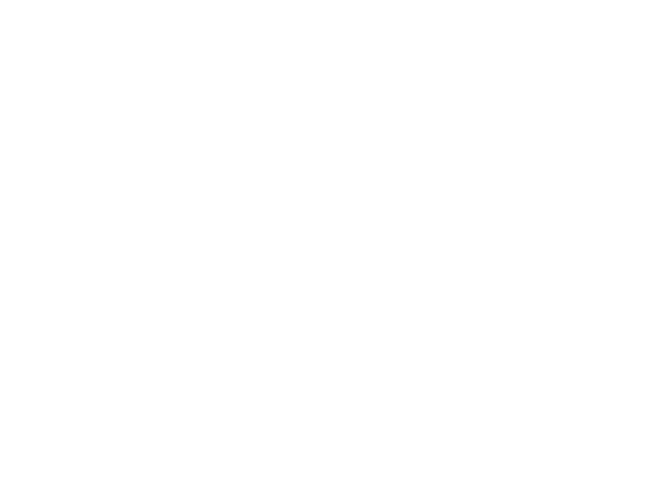

In [46]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels = True)
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [47]:
g = graph

print("Bellman-Ford algorithm:")
g.printArr(g.BellmanFord(0))

Bellman-Ford algorithm:
Расстояние вершины от источника
 0 		  0
 1 		 0
 2 		 0
 3 		 0
 4 		 0


In [48]:
g = graph

print("d algorithm:")
g.printArr(g.dijkstra(0))

d algorithm:
Расстояние вершины от источника
 0 		  0
 1 		 0
 2 		 0
 3 		 0
 4 		 0


In [49]:
g = graph

print("f algorithm:")
g.printArr(g.floydWarshall())

f algorithm:
Расстояние вершины от источника
 0 		 0
 1 		 0
 2 		 0
 3 		 0
 4 		 0


In [50]:
g = graph

print("j algorithm:")
#g.Johnson()

j algorithm:


In [51]:
g = graph

print("f algorithm:")
#g.levit(0)

f algorithm:


In [52]:
g = graph

g.printArr(g.yenAlgorithm(0))

Расстояние вершины от источника
 0 		  0
 1 		 0
 2 		 0
 3 		 0
 4 		 0


к-во вершин=5
к-во ребер=8
0-е ребро: 0 1 -1
1-е ребро: 0 2 4
2-е ребро: 1 2 3
3-е ребро: 1 3 2
4-е ребро: 1 4 2
5-е ребро: 3 2 5
6-е ребро: 3 1 1
7-е ребро: 4 3 -3

### Вывод